In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [3]:
df.shape

(1000, 40)

In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
df.drop('_c39', axis=1, inplace=True)


print(df.head())

   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [9]:
# Convert 'policy_bind_date' and 'incident_date' to datetime format
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])


In [10]:
# List of categorical columns
categorical_cols = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 
                    'insured_occupation', 'insured_hobbies', 'insured_relationship', 
                    'incident_type', 'collision_type', 'incident_severity', 
                    'authorities_contacted', 'incident_state', 'incident_city', 
                    'property_damage', 'police_report_available', 'auto_make', 'auto_model', 
                    'fraud_reported']

# Convert categorical columns to 'category' data type
for col in categorical_cols:
    df[col] = df[col].astype('category')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   category      
 5   policy_csl                   1000 non-null   category      
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   category      
 11  insured_education_level      1000 non-null  

In [12]:
# Check for duplicate policy numbers
duplicate_policy_numbers = df[df.duplicated(subset='policy_number', keep=False)]


if not duplicate_policy_numbers.empty:
    print("Rows with Duplicate Policy Numbers:")
    print(duplicate_policy_numbers[['policy_number']])
else:
    print("No Duplicate Policy Numbers Found.")


No Duplicate Policy Numbers Found.


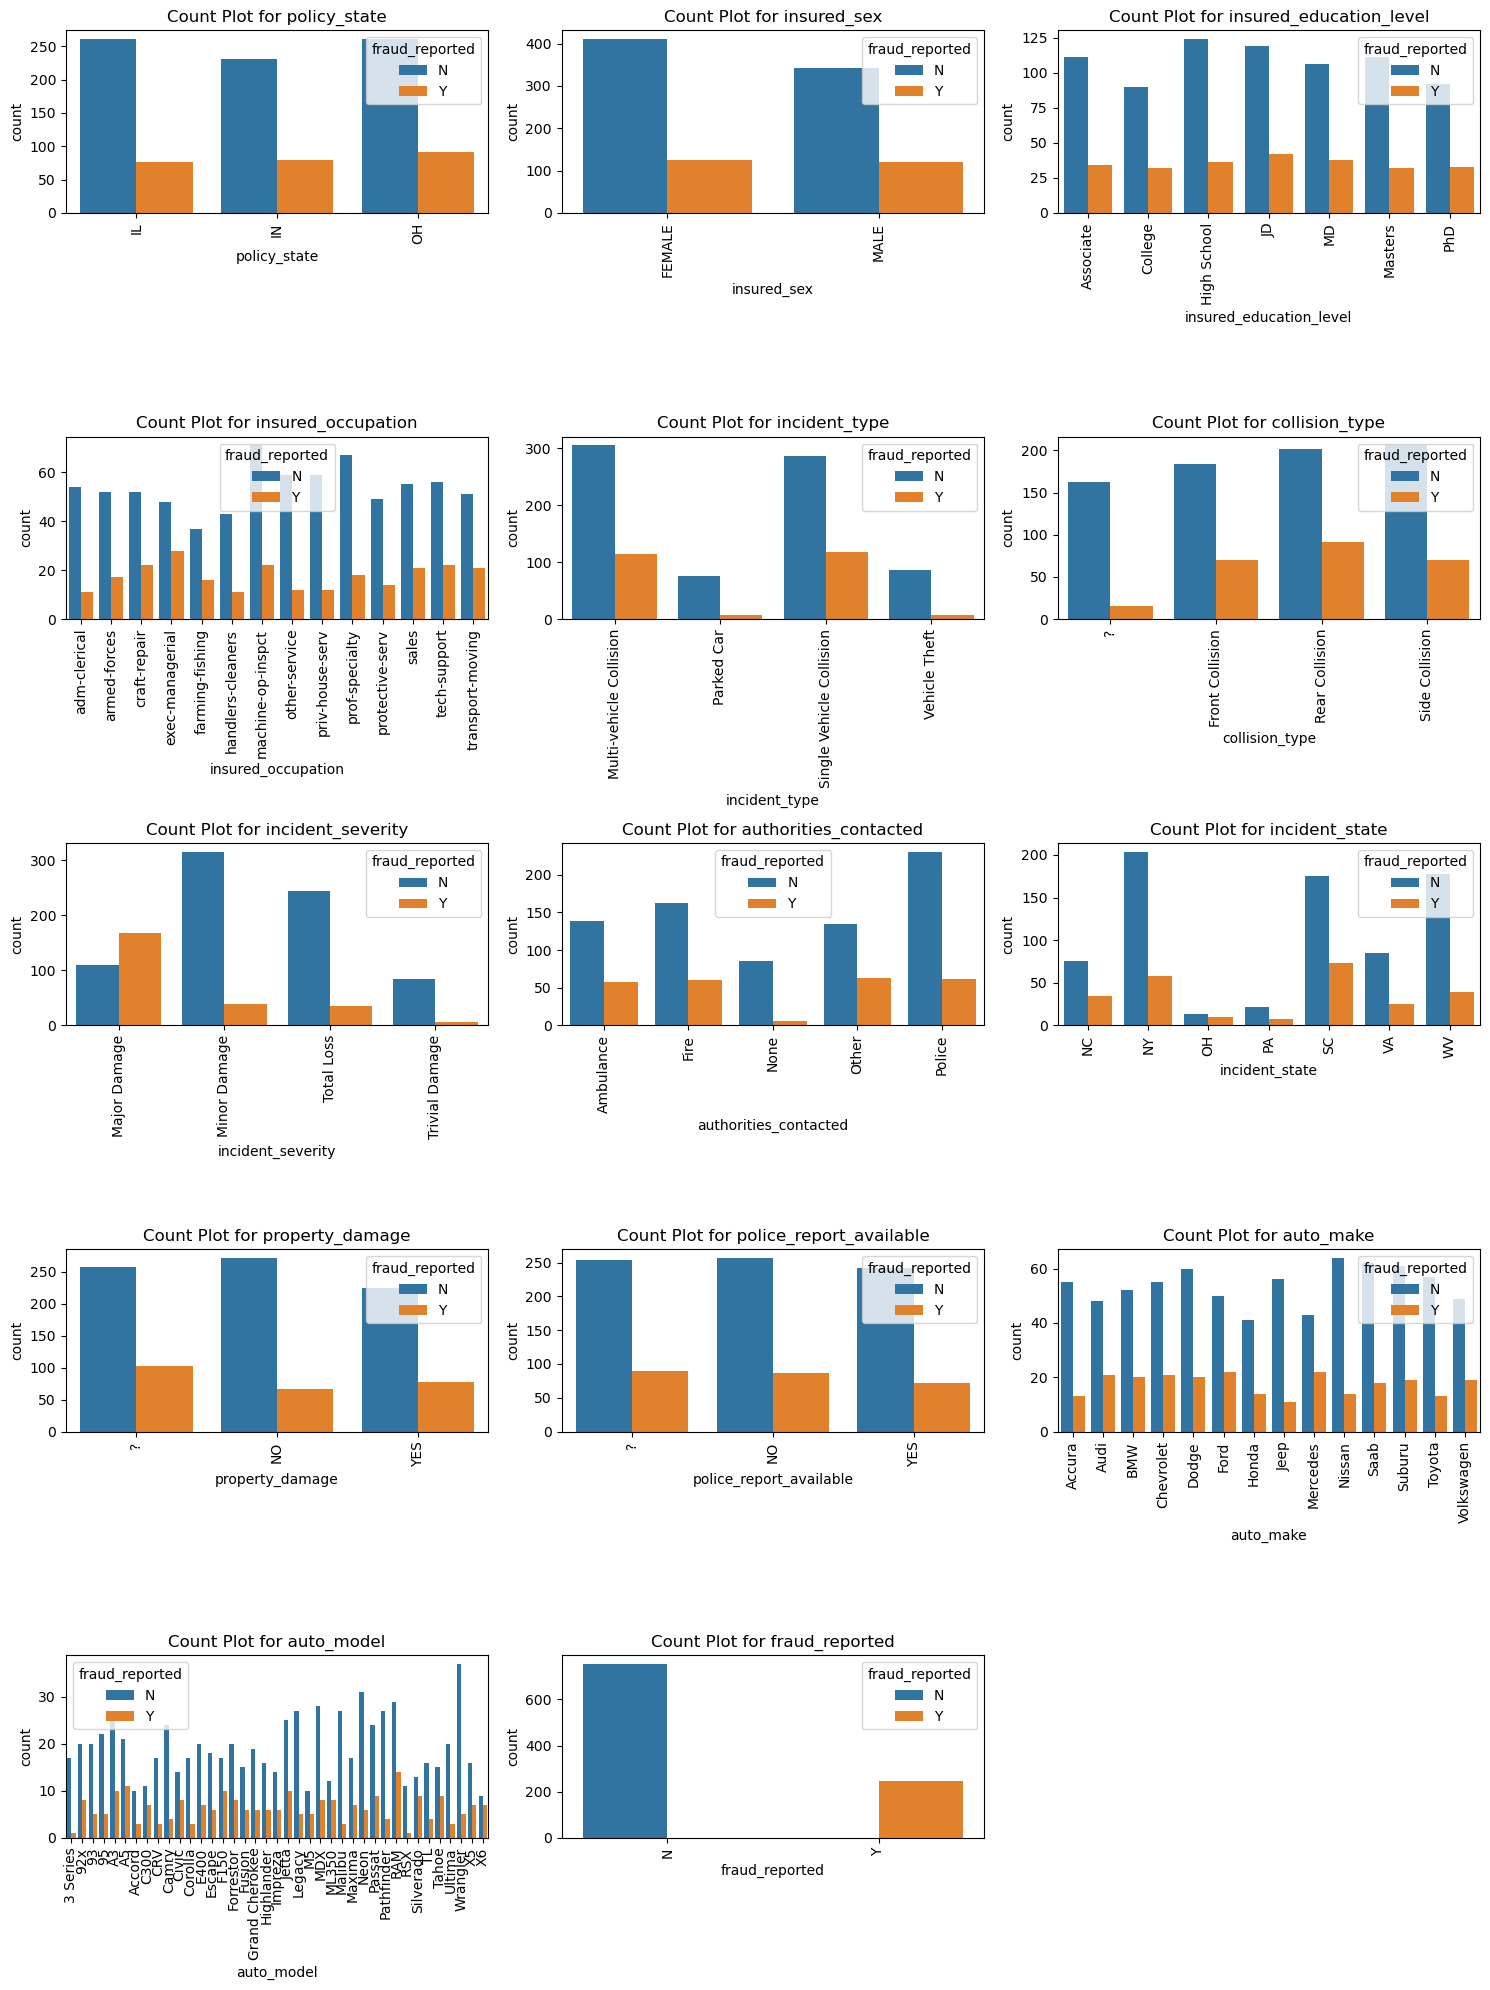

In [13]:
# Selecting a subset of categorical columns for better visualization
categorical_cols_subset = ['policy_state', 'insured_sex', 'insured_education_level',
                            'insured_occupation', 'incident_type', 'collision_type',
                            'incident_severity', 'authorities_contacted', 'incident_state',
                            'property_damage', 'police_report_available', 'auto_make',
                            'auto_model', 'fraud_reported']

# Plotting count plots for each categorical variable
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols_subset, 1):
    plt.subplot(5, 3, i)
    sns.countplot(data=df, x=col, hue='fraud_reported')
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


<Figure size 1500x1500 with 0 Axes>

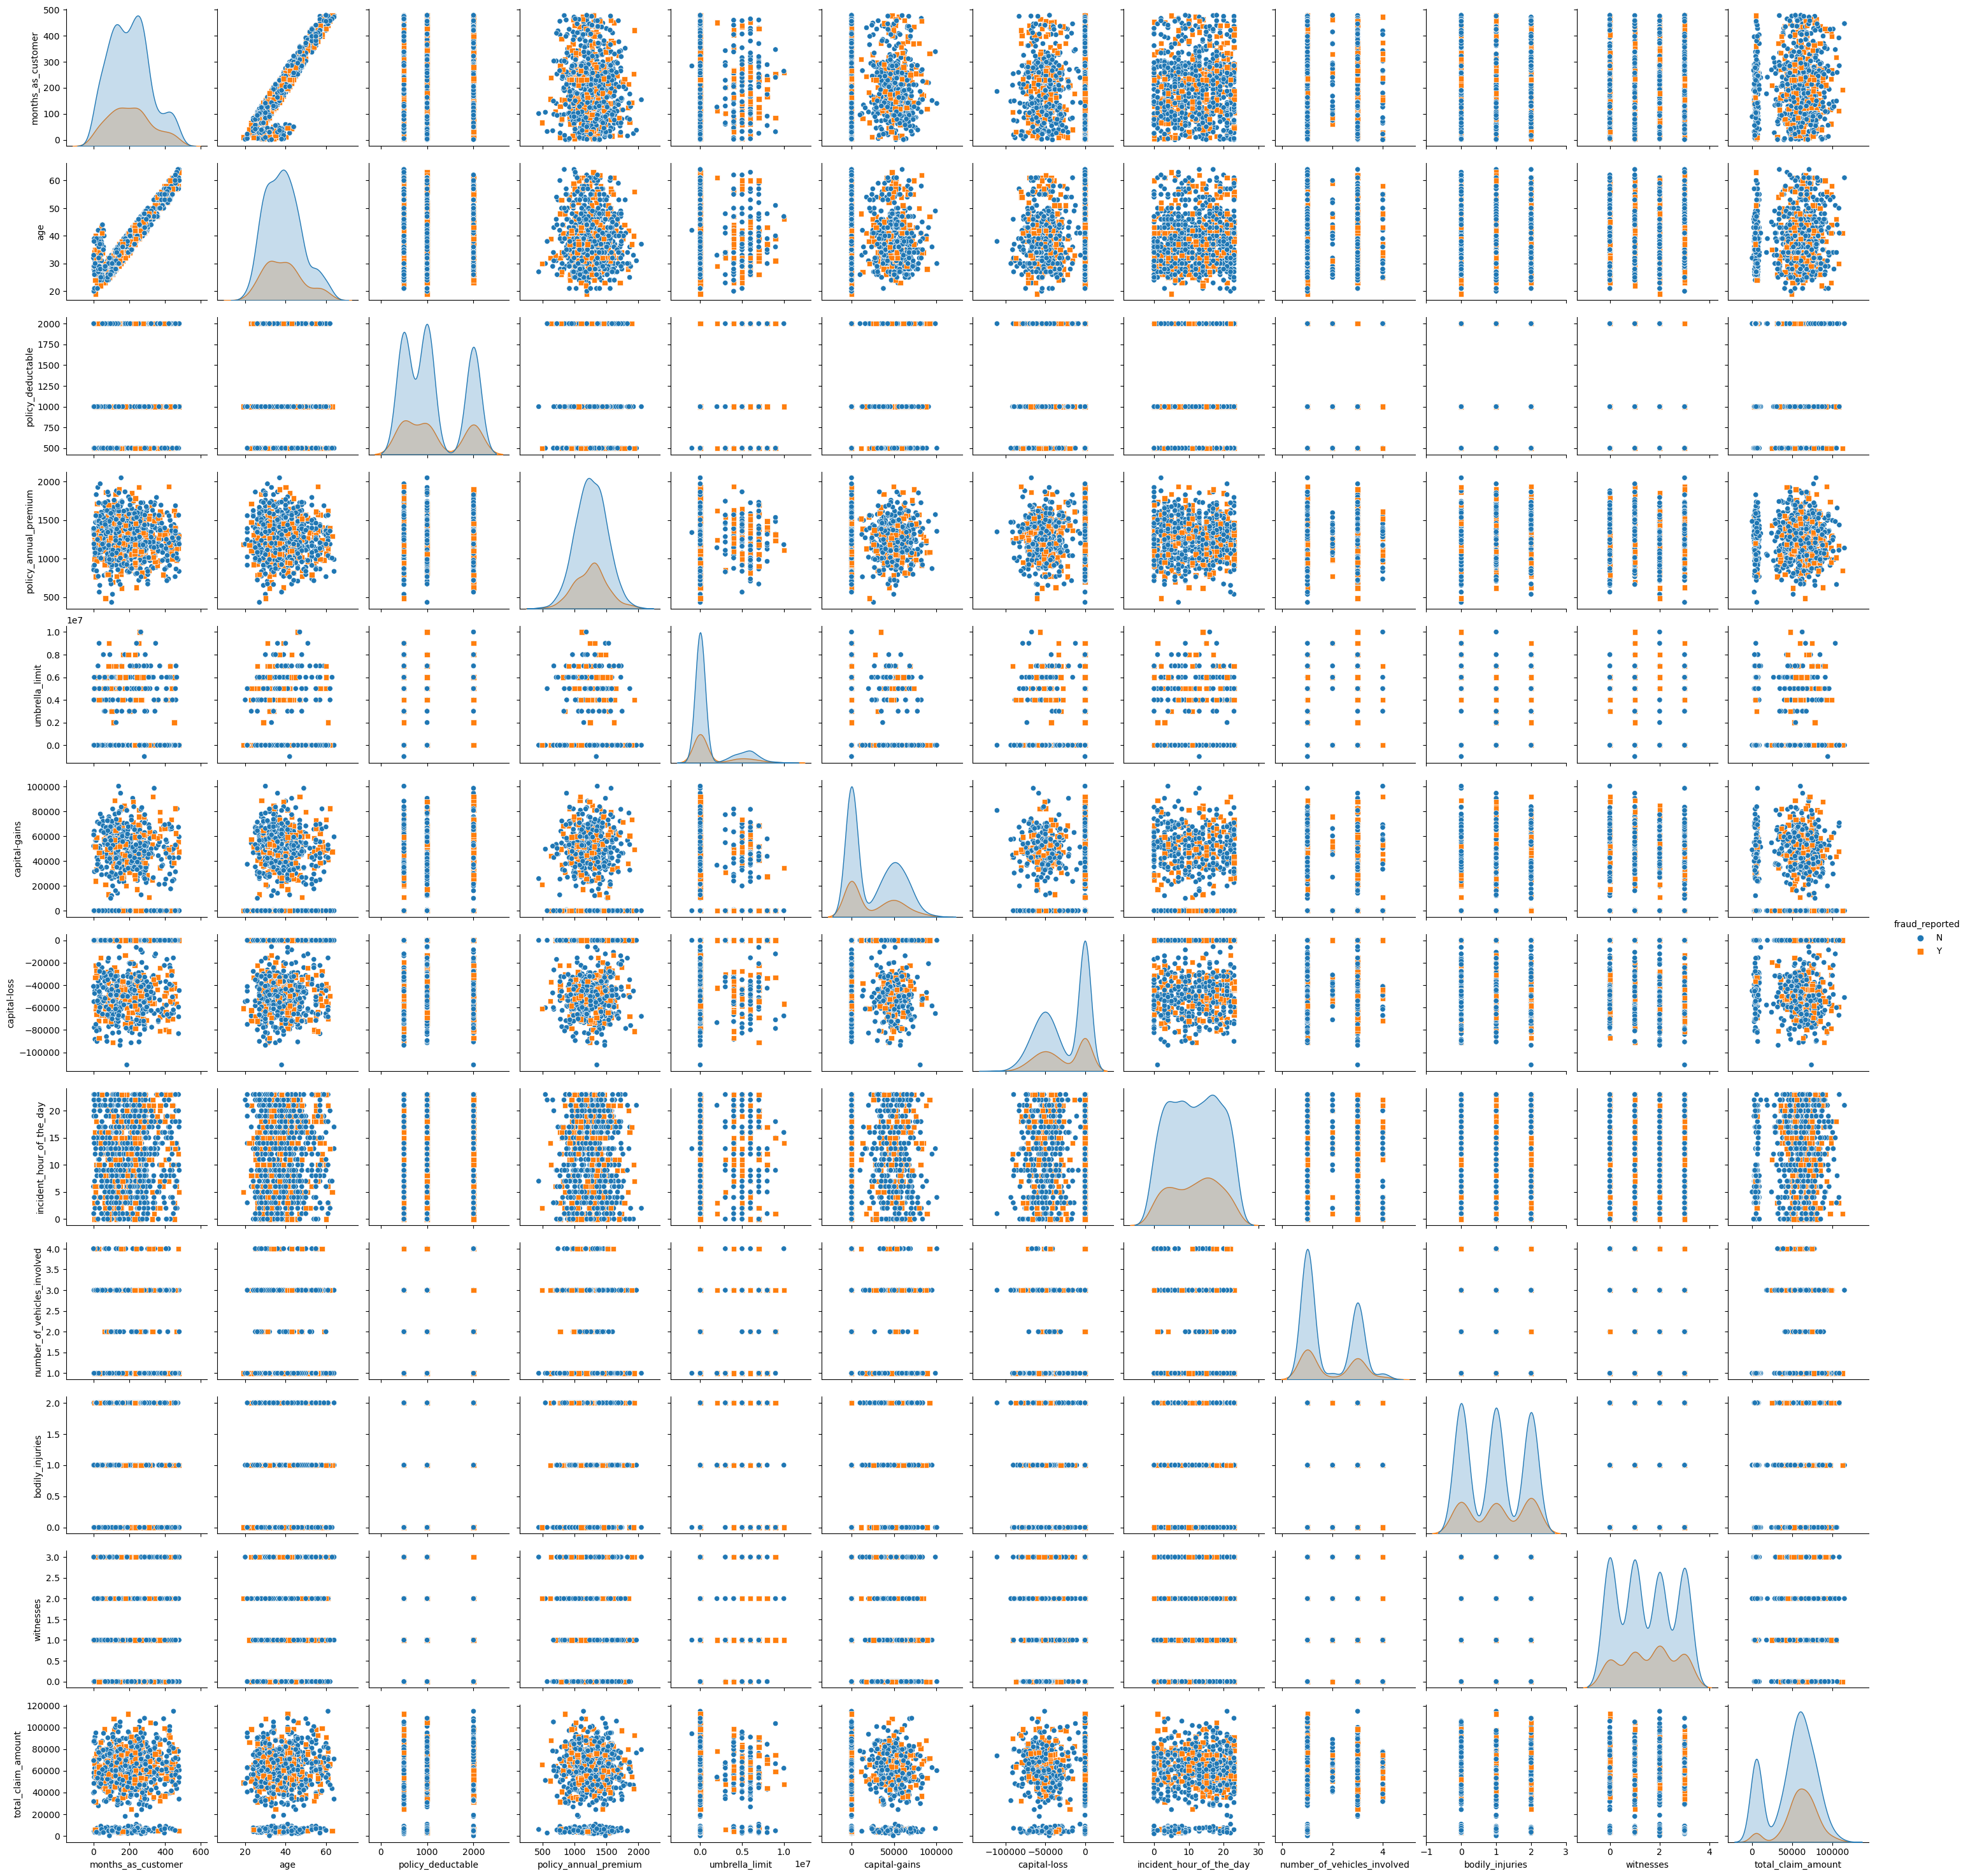

In [14]:

numerical_cols = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium',
                  'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
                  'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount']

# Adding 'fraud_reported' to see how it relates to numerical features
numerical_cols.append('fraud_reported')


plt.figure(figsize=(15, 15))

# Create a pair plot with rotated x-axis labels
sns.pairplot(df[numerical_cols], hue='fraud_reported', markers=['o', 's'], diag_kind='kde')
plt.xticks(rotation=45)

plt.show()


In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Splitting the dataset into features and target variable
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported'].map({'Y': 1, 'N': 0})  # Converting target to binary

# Splitting the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['int64', 'float64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['int64', 'float64']))

#  Model Building and Evaluation
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Dictionary to store results
results = {}

for name, model in models.items():
    # Training the model
    model.fit(X_train_scaled, y_train)
    
    # Training and test scores
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    
    # Cross-validation scores
    cv_score = cross_val_score(model, X_train_scaled, y_train, cv=5).mean()
    
    # Storing results in dictionary
    results[name] = {
        'Train Score (%)': train_score * 100,
        'Test Score (%)': test_score * 100,
        'Cross-validation Score (%)': cv_score * 100
    }

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


                            Logistic Regression  Decision Tree  Random Forest  \
Train Score (%)                          75.875         100.00          100.0   
Test Score (%)                           73.000          62.00           72.0   
Cross-validation Score (%)               75.250          67.25           75.5   

                            Gradient Boosting     SVM  
Train Score (%)                        88.375  76.875  
Test Score (%)                         69.000  72.500  
Cross-validation Score (%)             72.875  76.125  


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have already loaded and preprocessed your data into X, y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Predictions
train_predictions = logreg.predict(X_train)
test_predictions = logreg.predict(X_test)

# Evaluate the model
train_score = accuracy_score(y_train, train_predictions)
test_score = accuracy_score(y_test, test_predictions)

print("Train Score (%):", train_score * 100)
print("Test Score (%):", test_score * 100)

# Additional metrics
print("\nClassification Report (Test Set):\n", classification_report(y_test, test_predictions))


TypeError: float() argument must be a string or a real number, not 'Timestamp'